In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv(r"C:\Users\AJAY\Desktop\New folder\evdata.csv")

In [4]:
# Column Name	Description
# ===========================================================================================================================================
# Brand	                        The car manufacturer or brand name (e.g., BMW, Tesla, Kia).
# Model Name 	                The specific model and variant name of the vehicle. Sometimes includes battery or drive details
#                                 (e.g., “Model 3 Long    Range RWD”).
# Year	                        The model year or main release year for the vehicle.
# Availability          	    current vechile availability
# Range (km)	                The practical driving range of the car (in kilometers) based on real-world tests, not ideal lab results.
# Efficiency (Wh/km)	        How much energy the car uses per kilometer, in watt-hours per kilometer. Lower is better (more efficient).
# Battery (kWh)	                The size of the battery pack, measured in kilowatt-hours (kWh) — higher capacity means longer range.
# Weight (kg)	                The total weight of the car (in kilograms).
# Acceleration (0-100 km/h, sec) How many seconds it takes the car to accelerate from 0 to 100 km/h — lower values mean faster acceleration.
# Fast Charging Speed (kW)	    The maximum rate at which the car can charge using a DC fast charger (in kilowatts).
# Towing Capacity (kg)	        The maximum weight the car can tow (in kilograms).
# Cargo Volume (L)	            The total available cargo or trunk space (in liters).
# Price (€)	                    The base or starting price of the vehicle, shown in euros (€).

In [5]:
df.head()

,Availability,Range (km),Efficiency (Wh/km),Weight (kg),Acceleration (0-100s),Battery (kWh),Fastcharge (kW),Towing (kg),Cargo (L),Price (€),Year,Brand,Model
0,Yes,610,184,2405,3.9,112.0,250,2400,575.0,64860,2026,Volvo,EX60 P12 AWD (MY27)Volvo EX60 P12 AWD
1,Yes,455,176,2190,5.9,80.0,190,2000,575.0,56860,2026,Volvo,EX60 P6 (MY27)Volvo EX60 P6
2,Yes,610,178,2360,4.9,108.7,230,2000,578.0,58755,2025,BMW,iX3 50 xDrive (MY26)BMW iX3 50 xDrive
3,Yes,245,184,1645,7.9,45.1,51,750,400.0,30850,2025,BYD,ATTO 2BYD ATTO 2
4,Yes,360,171,1726,7.9,61.7,115,500,363.0,29745,2022,MG,MG4 Electric 64 kWhMG MG4 Electric 64 kWh


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2414 entries, 0 to 2413
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Availability           2414 non-null   object 
 1   Range (km)             2414 non-null   int64  
 2   Efficiency (Wh/km)     2414 non-null   int64  
 3   Weight (kg)            2414 non-null   int64  
 4   Acceleration (0-100s)  2414 non-null   float64
 5   Battery (kWh)          2414 non-null   float64
 6   Fastcharge (kW)        2414 non-null   int64  
 7   Towing (kg)            2414 non-null   int64  
 8   Cargo (L)              2414 non-null   float64
 9   Price (€)              2414 non-null   int64  
 10  Year                   2414 non-null   int64  
 11  Brand                  2414 non-null   object 
 12  Model                  2414 non-null   object 
dtypes: float64(3), int64(7), object(3)
memory usage: 245.3+ KB


In [7]:
df["Year"] = df["Year"].astype("object")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2414 entries, 0 to 2413
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Availability           2414 non-null   object 
 1   Range (km)             2414 non-null   int64  
 2   Efficiency (Wh/km)     2414 non-null   int64  
 3   Weight (kg)            2414 non-null   int64  
 4   Acceleration (0-100s)  2414 non-null   float64
 5   Battery (kWh)          2414 non-null   float64
 6   Fastcharge (kW)        2414 non-null   int64  
 7   Towing (kg)            2414 non-null   int64  
 8   Cargo (L)              2414 non-null   float64
 9   Price (€)              2414 non-null   int64  
 10  Year                   2414 non-null   object 
 11  Brand                  2414 non-null   object 
 12  Model                  2414 non-null   object 
dtypes: float64(3), int64(6), object(4)
memory usage: 245.3+ KB


In [9]:
# Here is twist

In [10]:
# when I web scraped the data i converted the missing values with 0's in df["Towing (kg)"], df["Cargo (L)"]  and df["Price (€)"]

<Axes: >

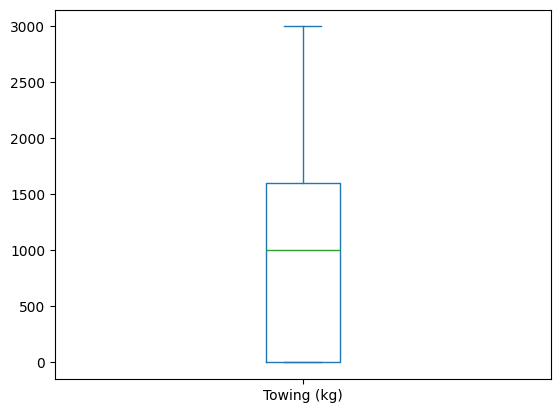

In [11]:
df["Towing (kg)"].plot(kind = "box")

<Axes: ylabel='Density'>

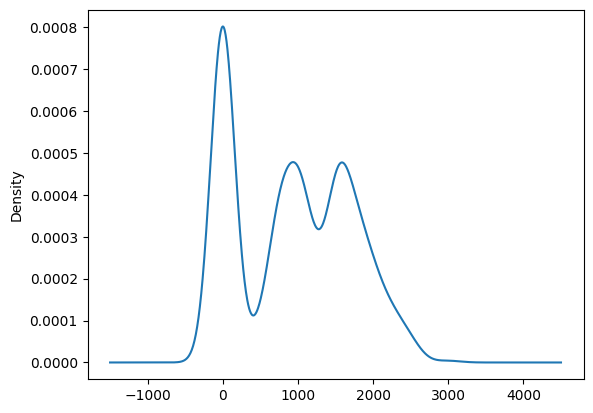

In [12]:
df["Towing (kg)"].plot(kind="density")

((array([-3.44352181, -3.19594408, -3.05881863, ...,  3.05881863,
          3.19594408,  3.44352181], shape=(2414,)),
  array([   0,    0,    0, ..., 3000, 3000, 3000], shape=(2414,))),
 (np.float64(725.3988590731087),
  np.float64(925.6619718309857),
  np.float64(0.9467893277909606)))

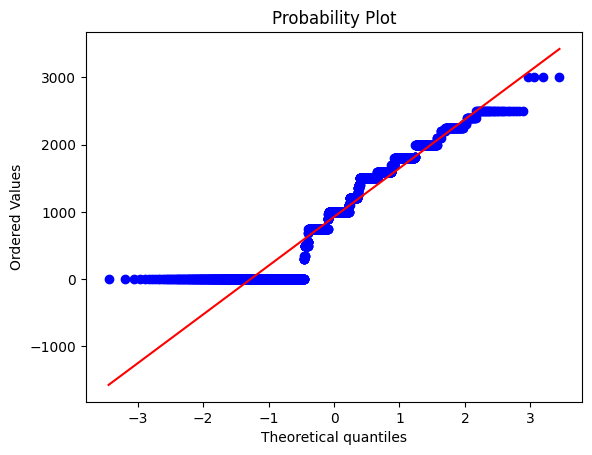

In [13]:
stats.probplot(df["Towing (kg)"],plot = plt)

In [14]:
# the above proves that no outliers are present 
# we have two options replace with mean or remove it
# 780/2414 * 100 = 32.31 %
# the null values (0's) are more than 30 %  so we have to replace with mean 

In [15]:
df["Towing (kg)"] = df["Towing (kg)"].apply( lambda x :round(df["Towing (kg)"].mean()) if x == 0 else x)

<Axes: >

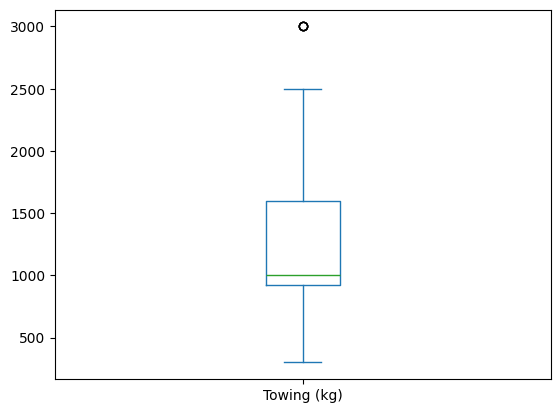

In [16]:
df["Towing (kg)"].plot(kind = "box")

<Axes: ylabel='Density'>

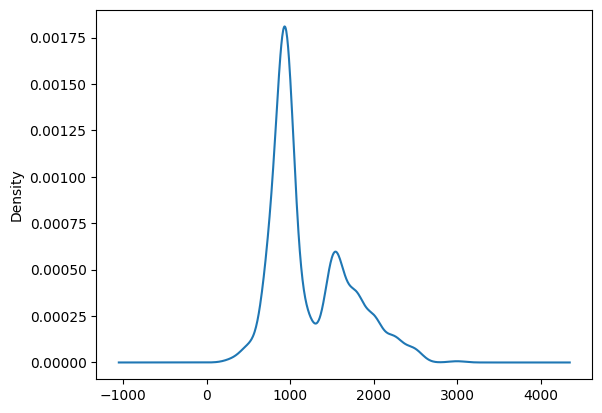

In [17]:
df["Towing (kg)"].plot(kind="density")

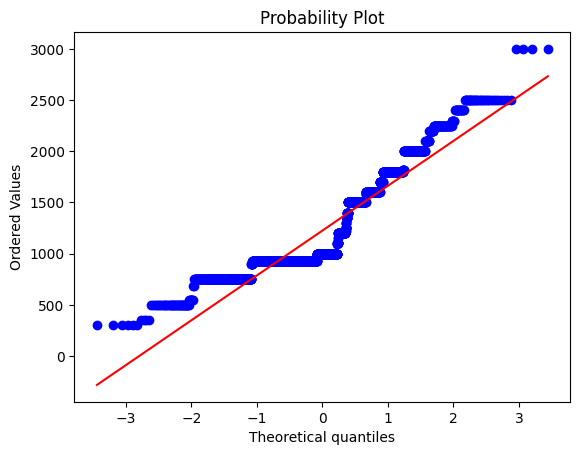

In [18]:
stats.probplot(df["Towing (kg)"],plot = plt)
plt.show()

<Axes: >

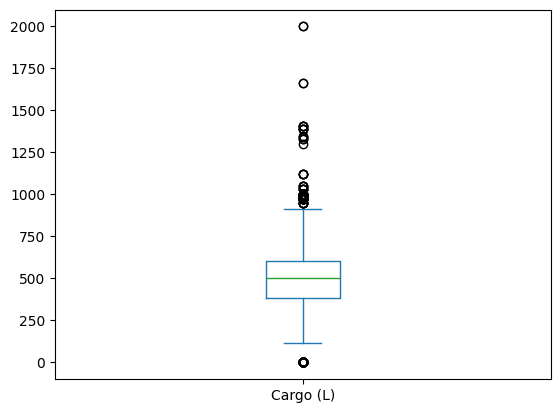

In [19]:
df["Cargo (L)"].plot(kind = "box")

<Axes: ylabel='Density'>

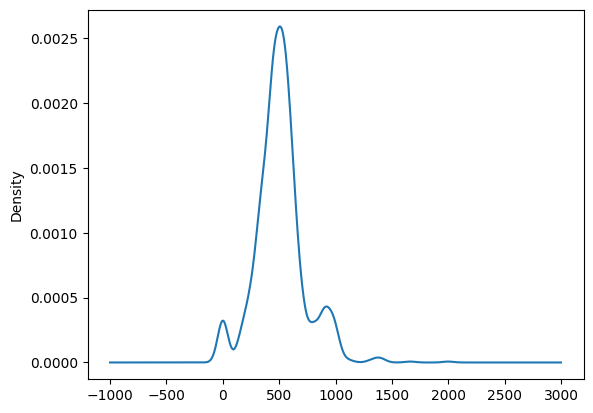

In [20]:
df["Cargo (L)"].plot(kind = "density")

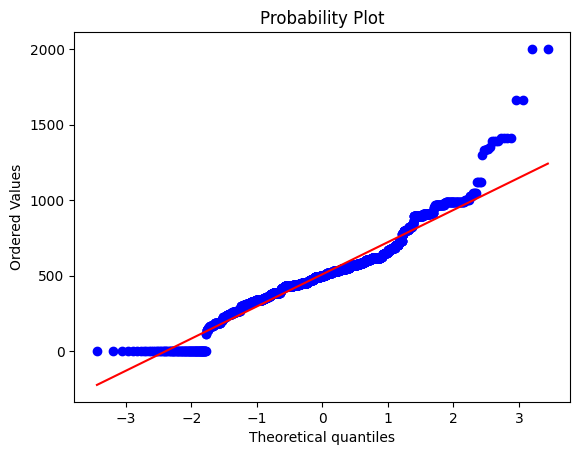

In [21]:
stats.probplot(df["Cargo (L)"],plot = plt)
plt.show()

In [22]:
# outliers exists 
#  two options (replace with median  or remove the values)
sum(df["Cargo (L)"] == 0)/len(df) *100
# 2.23 %  null values we can ignore it .

2.236951118475559

<Axes: >

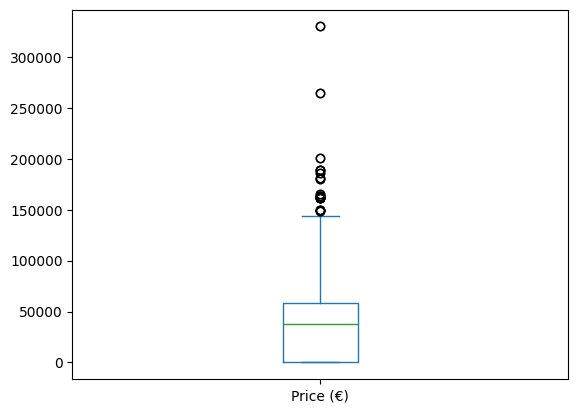

In [23]:
df["Price (€)"].plot(kind="box")

<Axes: ylabel='Density'>

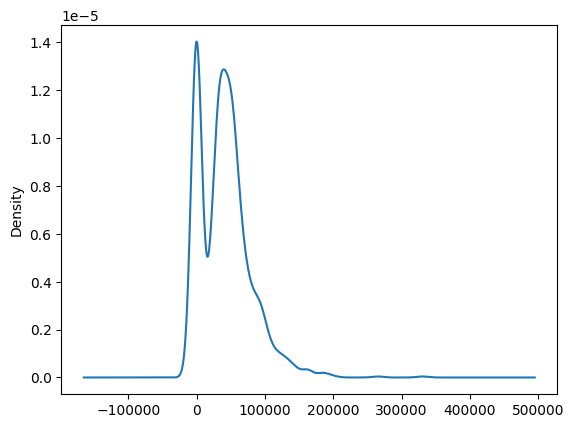

In [24]:
df["Price (€)"].plot(kind="density")

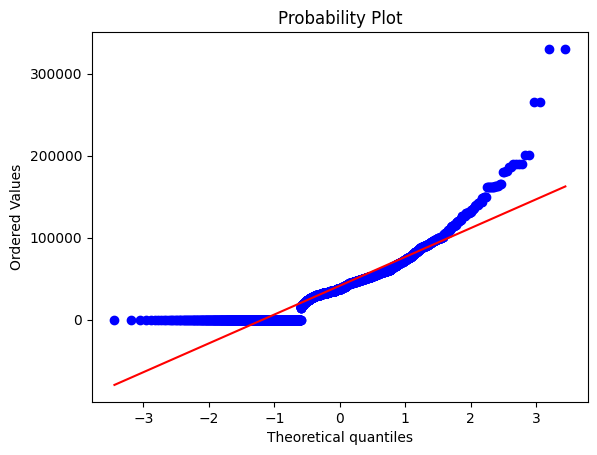

In [25]:
stats.probplot(df["Price (€)"],plot= plt)
plt.show()

In [26]:
# outliers exists 
#  two options (replace with median  or remove the values)
sum(df["Price (€)"] == 0)/len(df) *100
# 27.42 %  of null values we have to replace with median

27.42336371168186

In [27]:
df["Price (€)"] = df["Price (€)"].apply(lambda x : round(df["Price (€)"].median()) if x == 0 else x)

<Axes: >

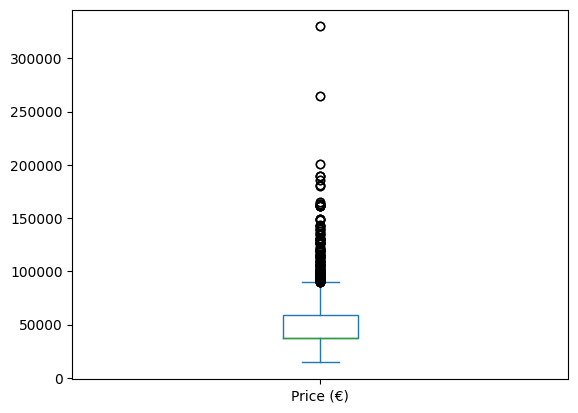

In [28]:
df["Price (€)"].plot(kind = "box")

<Axes: ylabel='Density'>

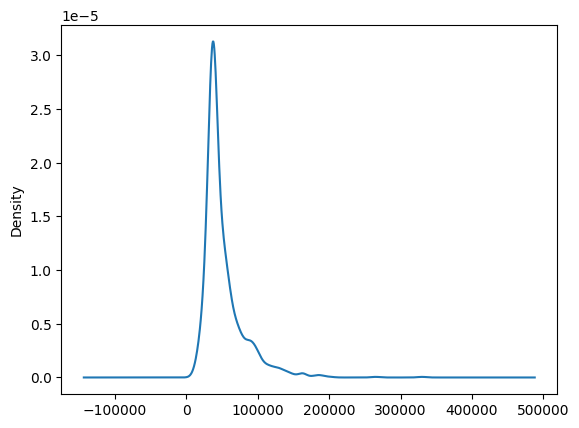

In [29]:
df["Price (€)"].plot(kind="density")

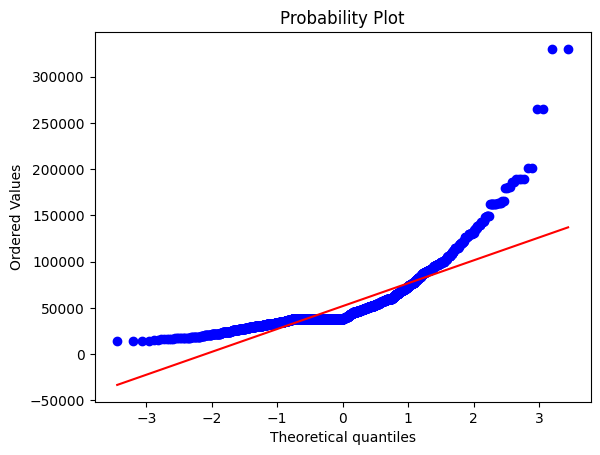

In [30]:
stats.probplot(df["Price (€)"],plot=plt)
plt.show()

In [31]:
# till now i handle the null values.
# ploted the columns after the handling 
# NOTE : "you can  observe the columns all are having  outliers . I am ignoring it because my dataset consists all price range vechiles(low to high) 
#         outliers occurs because of luxuries Vechiles (high price range) and i need outliers for overall analysis"

In [32]:
df.isnull().sum()

Availability             0
Range (km)               0
Efficiency (Wh/km)       0
Weight (kg)              0
Acceleration (0-100s)    0
Battery (kWh)            0
Fastcharge (kW)          0
Towing (kg)              0
Cargo (L)                0
Price (€)                0
Year                     0
Brand                    0
Model                    0
dtype: int64

In [33]:
df.duplicated().sum()

np.int64(1171)

In [34]:
df.drop_duplicates(inplace = True ,ignore_index=True)

In [35]:
df.duplicated().sum()

np.int64(0)

# Univariant Analysis

In [36]:
df.describe() # defualt it take numerical columns

,Range (km),Efficiency (Wh/km),Weight (kg),Acceleration (0-100s),Battery (kWh),Fastcharge (kW),Towing (kg),Cargo (L),Price (€)
count,1243.000000,1243.000000,1243.000000,1243.00000,1243.000000,1243.000000,1243.000000,1243.000000,1243.00000
mean,373.141593,192.538214,2107.296058,7.31601,70.953339,114.757844,1225.205149,513.102430,51730.13033
std,114.435030,31.585848,366.978463,3.10991,21.413788,57.482785,468.806873,244.139941,28455.68579
min,85.000000,109.000000,1009.000000,2.00000,14.500000,0.000000,300.000000,0.000000,14495.00000
25%,290.000000,170.000000,1881.000000,4.90000,58.000000,78.000000,926.000000,385.000000,37885.00000
50%,385.000000,185.000000,2154.000000,6.80000,74.000000,108.000000,1000.000000,500.000000,37885.00000
75%,455.000000,206.500000,2370.000000,8.90000,86.000000,140.000000,1600.000000,603.000000,58990.00000
max,720.000000,295.000000,3085.000000,22.40000,123.000000,330.000000,3000.000000,2000.000000,330000.00000


In [37]:
df.describe(include="object")

,Availability,Year,Brand,Model
count,1243,1243,1243,1243
unique,2,16,74,1037
top,No,2025,Mercedes-Benz,EQV 250 Extra-LongMercedes-Benz EQV 250 Extra-...
freq,642,292,126,4


In [38]:
num = df.select_dtypes(include=["int64","float64"]).columns

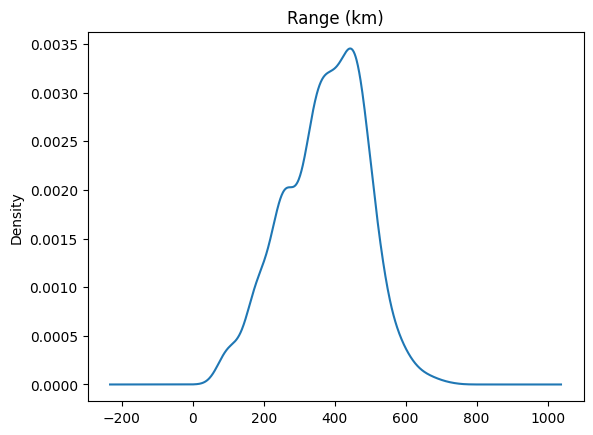

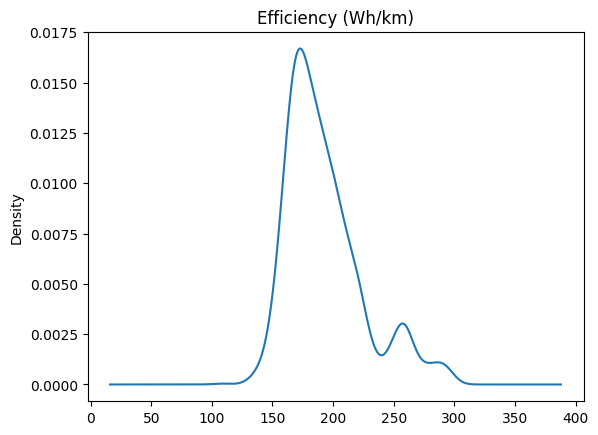

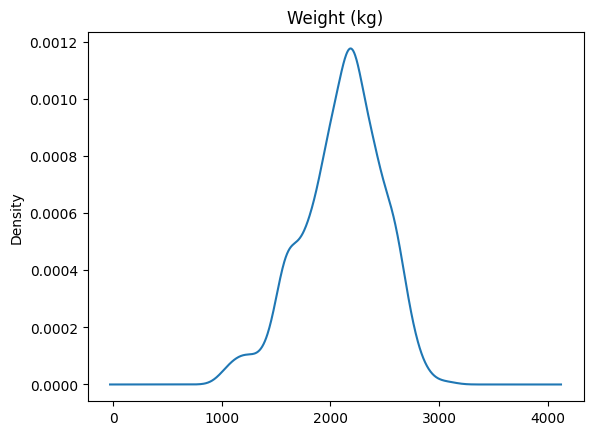

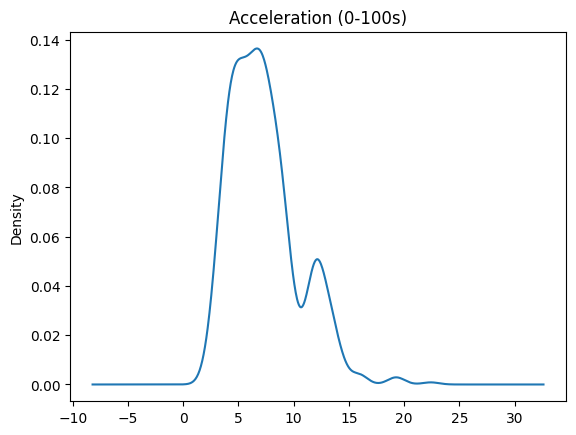

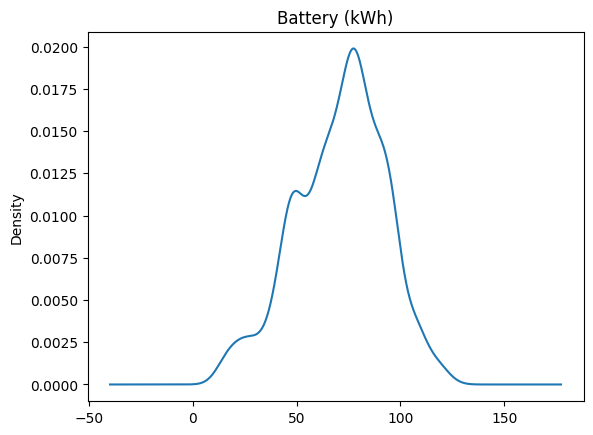

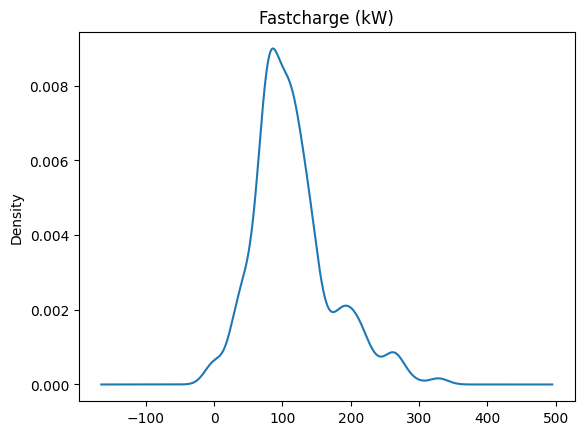

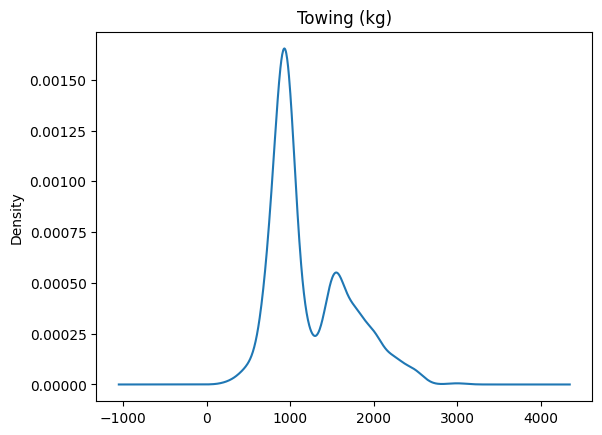

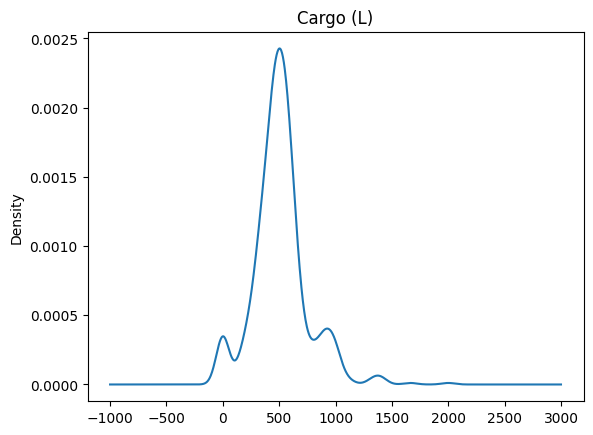

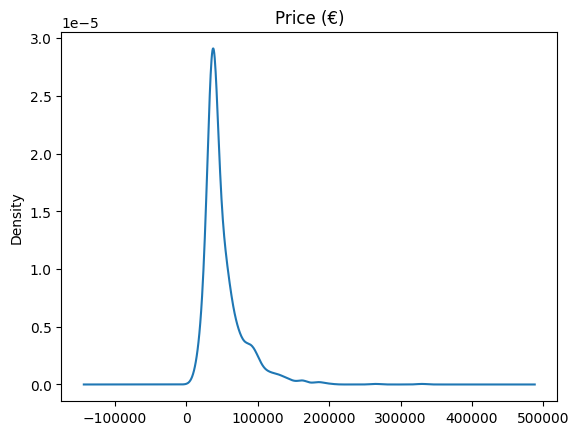

In [39]:
for i in num :
    plt.figure()
    df[i].plot(kind="density")
    plt.title(i)

<Axes: xlabel='Availability'>

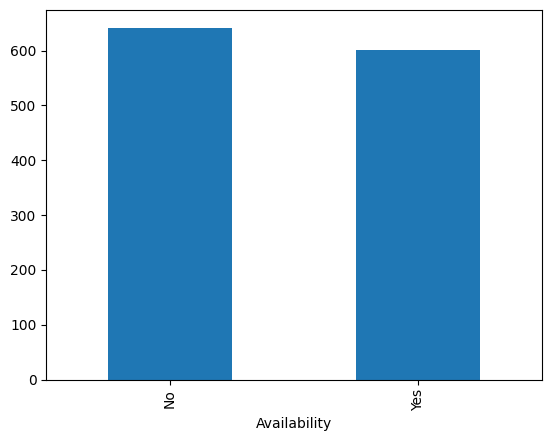

In [40]:
df["Availability"].value_counts().plot(kind="bar")

<Axes: xlabel='Brand'>

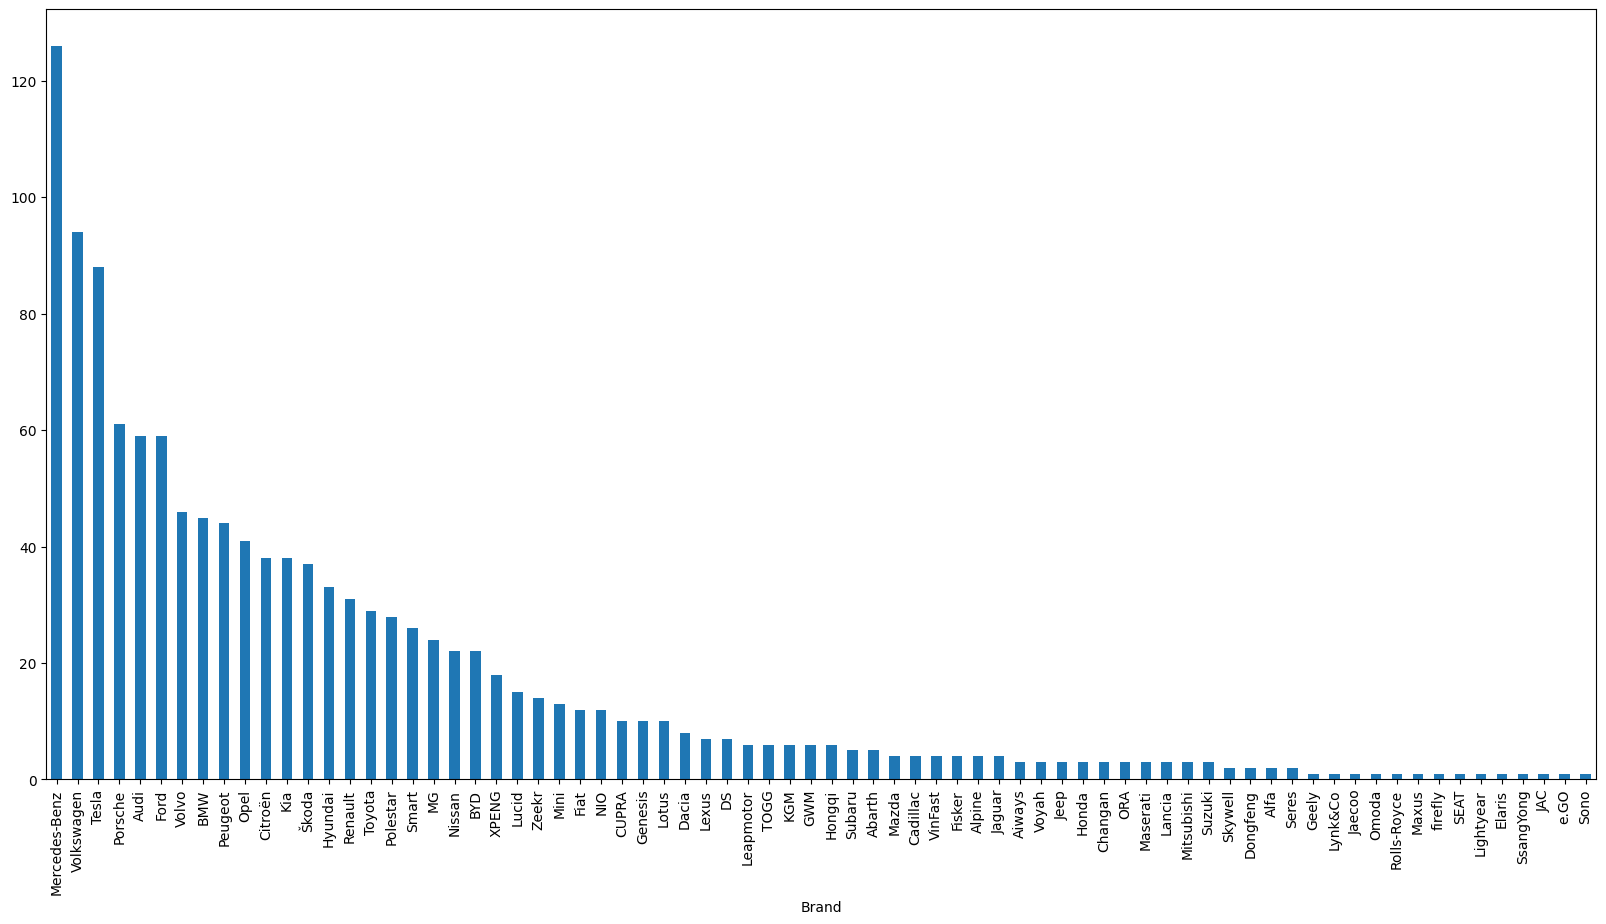

In [41]:
plt.figure(figsize=(20,10))
df["Brand"].value_counts().plot(kind="bar")

<Axes: xlabel='Year'>

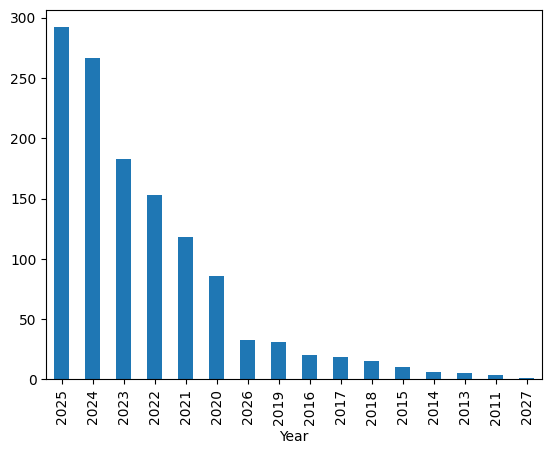

In [42]:
df["Year"].value_counts().plot(kind="bar")

# Bivariant Analysis

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Availability           1243 non-null   object 
 1   Range (km)             1243 non-null   int64  
 2   Efficiency (Wh/km)     1243 non-null   int64  
 3   Weight (kg)            1243 non-null   int64  
 4   Acceleration (0-100s)  1243 non-null   float64
 5   Battery (kWh)          1243 non-null   float64
 6   Fastcharge (kW)        1243 non-null   int64  
 7   Towing (kg)            1243 non-null   int64  
 8   Cargo (L)              1243 non-null   float64
 9   Price (€)              1243 non-null   int64  
 10  Year                   1243 non-null   object 
 11  Brand                  1243 non-null   object 
 12  Model                  1243 non-null   object 
dtypes: float64(3), int64(6), object(4)
memory usage: 126.4+ KB


<Axes: >

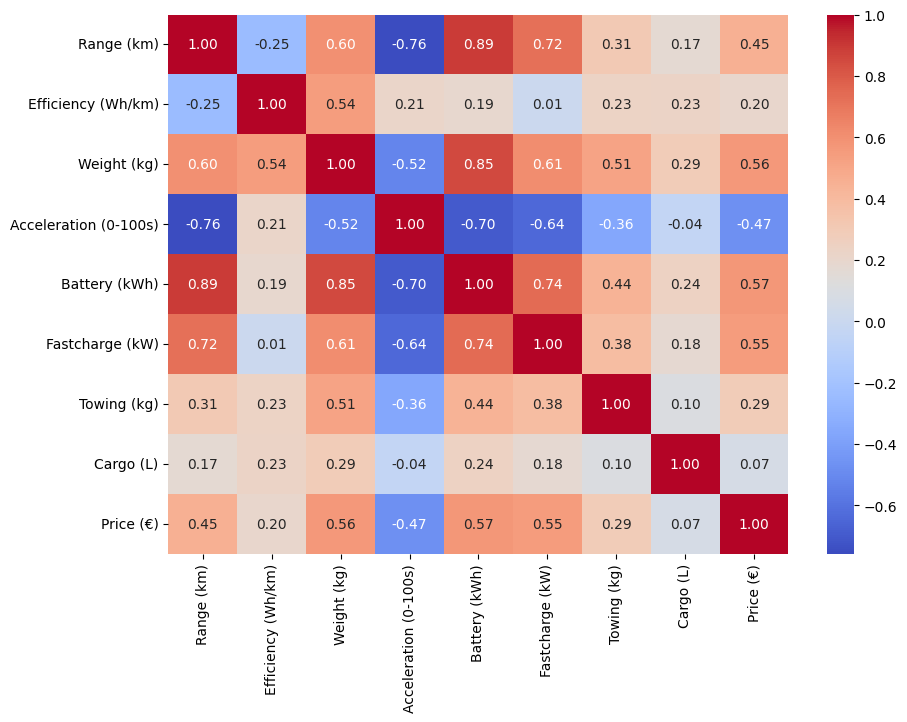

In [44]:
# numerical vs numerical columns
plt.figure(figsize=(10,7))

sns.heatmap(df[num].corr(),annot=True,cmap="coolwarm",fmt=".2f")

<Axes: xlabel='Battery (kWh)', ylabel='Acceleration (0-100s)'>

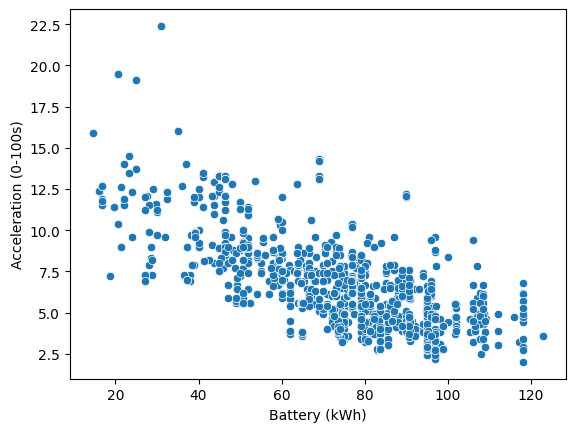

In [72]:
sns.scatterplot(x=df["Battery (kWh)"],y=df["Acceleration (0-100s)"])

<Axes: xlabel='Battery (kWh)', ylabel='Range (km)'>

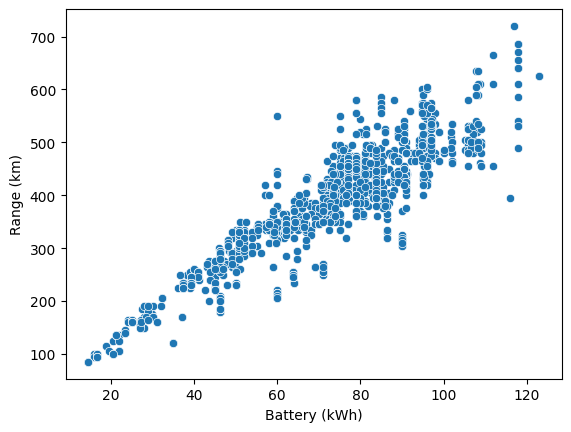

In [70]:
sns.scatterplot(x=df["Battery (kWh)"],y=df["Range (km)"])

In [84]:
y = df["Brand"].value_counts().head(10).index

In [86]:
df["Top_10_brands"] = df["Brand"].apply(lambda x:"others" if x not in y else x )

<Axes: xlabel='count', ylabel='Top_10_brands'>

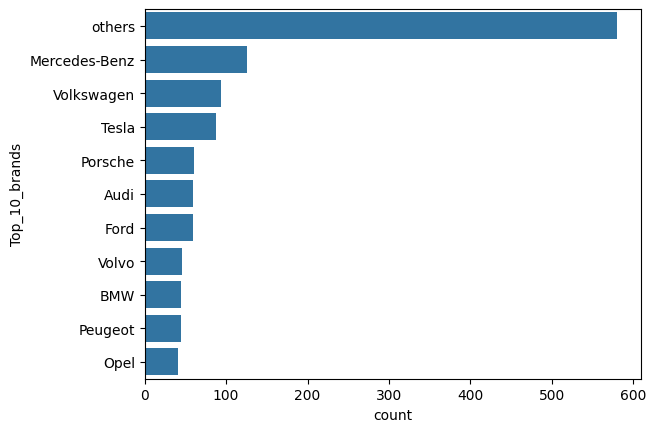

In [100]:
sns.barplot(df["Top_10_brands"].value_counts(),orient="h")

In [101]:
df

,Availability,Range (km),Efficiency (Wh/km),Weight (kg),Acceleration (0-100s),Battery (kWh),Fastcharge (kW),Towing (kg),Cargo (L),Price (€),Year,Brand,Model,Top_10_brands
0,Yes,610,184,2405,3.9,112.0,250,2400,575.00,64860,2026,Volvo,EX60 P12 AWD (MY27)Volvo EX60 P12 AWD,Volvo
1,Yes,455,176,2190,5.9,80.0,190,2000,575.00,56860,2026,Volvo,EX60 P6 (MY27)Volvo EX60 P6,Volvo
2,Yes,610,178,2360,4.9,108.7,230,2000,578.00,58755,2025,BMW,iX3 50 xDrive (MY26)BMW iX3 50 xDrive,BMW
3,Yes,245,184,1645,7.9,45.1,51,750,400.00,30850,2025,BYD,ATTO 2BYD ATTO 2,others
4,Yes,360,171,1726,7.9,61.7,115,500,363.00,29745,2022,MG,MG4 Electric 64 kWhMG MG4 Electric 64 kWh,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,Yes,250,255,2348,12.8,63.8,75,2000,1.00,54424,2025,Volkswagen,e-Transporter Kombi L2 100 kW 64 kWhVolkswagen...,Volkswagen
1239,Yes,245,260,2568,12.8,63.8,75,2000,1.00,57149,2025,Volkswagen,e-Caravelle L2 100 kW 64 kWhVolkswagen e-Carav...,Volkswagen
1240,No,205,293,2576,12.0,60.0,60,926,1.03,37885,2021,Mercedes-Benz,EQV 250 LongMercedes-Benz EQV 250 Long,Mercedes-Benz
1241,Yes,210,286,2641,12.0,60.0,60,926,1.41,37885,2024,Mercedes-Benz,EQV 250 Extra-LongMercedes-Benz EQV 250 Extra-...,Mercedes-Benz


<Axes: xlabel='Battery (kWh)', ylabel='Range (km)'>

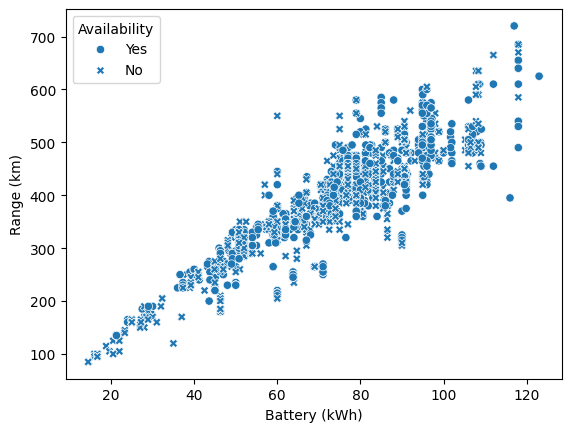

In [68]:
sns.scatterplot(x=df["Battery (kWh)"],y=df["Range (km)"],style=df["Availability"])

## Insights

In [ ]:
# Based on all the analyses and visualizations performed in this notebook, the following interpretations 
# summarize the overall Electric Vehicle (EV) market landscape.

#  EV Market: Concentrated but Competitive
# Data evidence: The top 15 brands contribute roughly 64 % of all EV models.
# Mercedes-Benz leads with 8 % (78 models), while over 50 other brands make up the “Others” category (≈ 36 %).
# Interpretation: The EV market shows a few strong incumbents but remains highly diverse and open, 
# reflecting a healthy level of competition and innovation.

# ️ Price Reflects Core Performance Features
# Data evidence: Moderate positive correlations were observed between price and performance metrics:
# Price (€) ↔ Battery Capacity (kWh) ≈ +0.6
# Price (€) ↔ Real-World Range (km) ≈ +0.5
# Price (€) ↔ Fast Charging Speed (kW) ≈ +0.4
# Interpretation: Higher-priced EVs generally offer larger batteries, better range, and faster charging speeds 
# — suggesting that battery technology and charging capability drive cost more than brand alone.

# ️ Clear Range–Performance Trade-Off
# Data evidence:
# Range (km) ↔ Battery Capacity (kWh) ≈ +0.90 (very strong positive)
# Range (km) ↔ Acceleration (sec) ≈ –0.74 (strong negative)
# Battery Capacity (kWh) ↔ Acceleration (sec) ≈ –0.69
# Interpretation: Larger batteries provide longer range and stronger performance, 
# but faster acceleration reduces efficiency and range — a physics-driven trade-off visible across models.

#  Energy Efficiency Is Mostly Independent of Price
# Data evidence:
# Energy Efficiency (Wh/km) ↔ Price (€) ≈ +0.2 (weak positive)
# Interpretation: Expensive cars are not necessarily more efficient. 
# Efficiency depends more on drivetrain design, aerodynamics, and power management than on price.

# ️⃣ Practical Features (Towing & Cargo) Are Secondary
# Data evidence:
# Median towing capacity ≈ 1000 kg, but 25 % of EVs cannot tow at all.
# Cargo space centers around 500 L, with minimal link to price (r ≈ +0.2).
# Interpretation: These features are not yet major determinants of price or consumer targeting;
# current EVs emphasize range, performance, and technology over heavy-duty utility.

# ️⃣ Market Trend: Modern and Rapidly Evolving
# Data evidence:
# Median model year ≈ 2023; maximum year = 2026.
# Interpretation: The dataset captures a forward-looking snapshot of the EV market,
# including many models recently launched or upcoming — a sign of fast innovation cycles.

#  Overall Insights
# Battery capacity is the strongest predictor of both range and performance.
# Performance vs Efficiency trade-off remains fundamental.
# Price tiers (Budget – Mid – Premium) reflect more on brand and comfort features than pure technical superiority.
# EV market diversity continues to expand, suggesting opportunity for both established automakers and emerging players.


In [ ]:
# based on the production

# Range (km) = 300 - 500
# efficiency(wh/km) = 150 - 200
# weight(kg) = 2000 - 2500
# Accelaration(0-100) = 4-8
# battery(kwh) = 50 - 100
# Fast Charging(kw) = 50-150
# Towing(Kg) = 500 - 1000
# Cargo(L) = 400 -500
# Price(euro)  = 20000-30000 (Price (INR) ≈ ₹18 lakh – ₹27 lakh)